In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests
import time
import tqdm
from datetime import datetime
import scipy.stats as ss 
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['axes.titlesize'] = 18

In [67]:
total_eth_staked = 22_000_000
malicious_eth = total_eth_staked / 3
good_eth = total_eth_staked - malicious_eth
malicious_eth, good_eth

(7333333.333333333, 14666666.666666668)

In [100]:
2**15

32768

In [101]:
MAXEB = 32768

In [102]:
malicious_vals = round(malicious_eth / MAXEB)
good_vals = round(good_eth / 32)
malicious_vals, good_vals

(224, 458333)

In [103]:
total_vals = np.asarray(['bad'] * malicious_vals + ['good'] * good_vals)

In [104]:
att_committee_size = len(total_vals) // 32
att_committee_size

14329

In [105]:
malicious_props = []
for _ in range(1000):
    np.random.shuffle(total_vals)
    for i in range(32):
        curr_committee = total_vals[i*att_committee_size:(i+1)*att_committee_size]
        malicious_stake = MAXEB * np.count_nonzero(curr_committee == 'bad')
        good_stake = 32 * np.count_nonzero(curr_committee == 'good')
        total_stake = malicious_stake + good_stake
        malicious_props.append(malicious_stake / total_stake)
malicious_props = np.asarray(malicious_props)
len(malicious_props)

32000

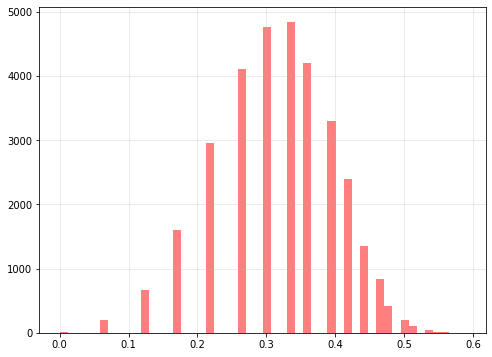

In [106]:
f, ax = plt.subplots(figsize=(8,6))
ax.hist(malicious_props, bins=50, color='red', alpha=0.5)
plt.show()

In [107]:
print("MAX_EFFECTIVE_BALANCE={}".format(MAXEB))
for q in [0.5, 0.75, 0.9, 0.99, 0.999]:
    print("q{} = {}".format(q, np.quantile(malicious_props, q)), end=' ')
    print()

MAX_EFFECTIVE_BALANCE=32768
q0.5 = 0.33355048859934855 
q0.75 = 0.39157036029911624 
q0.9 = 0.4169550877478725 
q0.99 = 0.5003664793549963 
q0.999 = 0.5337329380721243 


In [121]:
# closed form
total_eth_staked = 22_000_000
malicious_eth = total_eth_staked / 3
good_eth = total_eth_staked - malicious_eth
malicious_eth, good_eth

(7333333.333333333, 14666666.666666668)

In [122]:
MAXEB = 2048

In [123]:
malicious_vals = round(malicious_eth / MAXEB)
good_vals = round(good_eth / 32)
total_vals = malicious_vals + good_vals
malicious_vals, good_vals

(3581, 458333)

In [124]:
att_committee_size = total_vals // 32
att_committee_size

14434

In [125]:
prob_malicious = malicious_vals / total_vals
prob_malicious

0.007752525361863897

In [126]:
num_malicious_needed = np.ceil(32 * att_committee_size / (MAXEB + 32))
num_malicious_needed

223.0

In [127]:
prob_malicious = 1-ss.binom.cdf(num_malicious_needed-1, att_committee_size, prob_malicious)
print("probability of a malicious committee={}".format(prob_malicious))

probability of a malicious committee=1.1102230246251565e-16


In [128]:
def getProbMalicious(maxeb):
    total_eth_staked = 22_000_000
    malicious_eth = total_eth_staked / 3
    good_eth = total_eth_staked - malicious_eth
    malicious_vals = round(malicious_eth / MAXEB)
    good_vals = round(good_eth / 32)
    total_vals = malicious_vals + good_vals
    att_committee_size = total_vals // 32
    prob_malicious = malicious_vals / total_vals
    num_malicious_needed = np.ceil(32 * att_committee_size / (MAXEB + 32))
    return 1-ss.binom.cdf(num_malicious_needed-1, att_committee_size, prob_malicious)

In [129]:
2**11

2048

In [131]:
for i in range(8, 16):
    MAXEB = 2**i
    print("MAXEB={}; probability of a malicious committee={}".format(MAXEB, getProbMalicious(MAXEB)))

MAXEB=256; probability of a malicious committee=1.1102230246251565e-16
MAXEB=512; probability of a malicious committee=1.1102230246251565e-16
MAXEB=1024; probability of a malicious committee=1.1102230246251565e-16
MAXEB=2048; probability of a malicious committee=1.1102230246251565e-16
MAXEB=4096; probability of a malicious committee=2.500766260737919e-11
MAXEB=8192; probability of a malicious committee=1.946218190274074e-06
MAXEB=16384; probability of a malicious committee=0.0006302720356745617
MAXEB=32768; probability of a malicious committee=0.012784330850232672
